<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (5 Marks)

In [1]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Change the current working to the Project Directory
import os
path='/content/drive/My Drive/Colab Notebooks/NLP Project 2'
os.chdir(path)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/NLP Project 2'

In [4]:
#Unzipping the file.
import zipfile
with zipfile.ZipFile('Data-20201127T155239Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [166]:
#Importing Data from JSON file
import pandas as pd
Data_Set=pd.read_json('Data/Sarcasm_Headlines_Dataset.json', lines=True)
Data_Set.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


The JSON File has been etracted and data has been stored in Data Frame Data_Set

# **Data Analysis**

In [167]:
print('Shape of the Dataset: {}'.format(Data_Set.shape))
print('There are 26709 rows and 3 columns in the data')
if Data_Set.isnull().sum(axis = 0).sum() <= 0:
  print('There are no NULL values in the data')
else:
  print('There are NULL values in the data')

Shape of the Dataset: (26709, 3)
There are 26709 rows and 3 columns in the data
There are no NULL values in the data


In [168]:
Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [169]:
Data_Set.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


There are 26709 rows and 3 columns in the data
There are no NULL values in the data.
The mean value is 0.43 Hence data is not highly skewed.

Replacing the shortcut words with the full form.

In [9]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [170]:
def clean_text(text):
  # Convert words to lower case
  text = text.lower()
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
      text = " ".join(new_text)
  return text

In [171]:
import nltk
import re
from nltk.corpus import stopwords 
from pickle import dump, load
nltk.download('stopwords')
clean_headline = []
for h in Data_Set.headline:
  clean_headline.append(clean_text(h))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
 Data_Set['headline']=clean_headline

### Drop `article_link` from dataset (5 Marks)

In [173]:
#Dropping Column article_link from dataset
Data_Set.drop(columns=['article_link'],inplace=True)

In [174]:
#Printing top 5 records
Data_Set.head(5)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (5 Marks)

In [175]:
#Creating the column to store headline length
Data_Set["HeadLine_Length"]= Data_Set["headline"].str.len() 

In [176]:
print('Data with the Mininum HeadLine Length is:')
print(Data_Set[Data_Set["HeadLine_Length"]==Data_Set.HeadLine_Length.min()])
print('\nData with the Maximum HeadLine Length is:')
print(Data_Set[Data_Set["HeadLine_Length"]==Data_Set.HeadLine_Length.max()])

Data with the Mininum HeadLine Length is:
      headline  is_sarcastic  HeadLine_Length
20551  bye bye             0                7

Data with the Maximum HeadLine Length is:
                                                headline  ...  HeadLine_Length
19868  maya angelou, poet, author, civil rights activ...  ...              254

[1 rows x 3 columns]


In [177]:
Data_Set.head(5)

,headline,is_sarcastic,HeadLine_Length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


There are 14985 records in dataset with no sarcasam
There are 11724 records in dataset with sarcasam



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


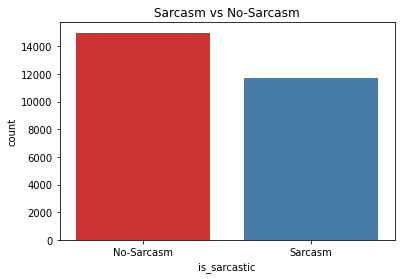

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
df=Data_Set.copy()
df['is_sarcastic'].replace(0, 'No-Sarcasm',inplace=True)
df['is_sarcastic'].replace(1, 'Sarcasm',inplace=True)
count_df=pd.DataFrame(Data_Set[['headline','is_sarcastic']].groupby(['is_sarcastic']).count())
print('There are {} records in dataset with no sarcasam'.format(count_df['headline'][0]))
print('There are {} records in dataset with sarcasam\n'.format(count_df['headline'][1]))
plt.title('Sarcasm vs No-Sarcasm')
sns.countplot(df.is_sarcastic,palette="Set1")
plt.show()

In [179]:
#Checking the data for special characters
import string
import numpy as np
special_char=0
alphabets=0
digits=0
char=0
space=0
l = []
for i in Data_Set.headline:
  for j in i:
    char=char + 1
    if(j.isalpha()): 
      alphabets = alphabets + 1
    elif(j.isdigit()):
      digits = digits + 1
    elif(j.isspace()):
      space=space+1
    else:
      special_char = special_char + 1
      l.append(j)
print('Out of {} Characters in the Headline data there are {} alphabets, {} digits ,{} spaces and {} special characters'.format(char,alphabets,digits,space,special_char))
print('\nUnique special characters are ')
print(np.unique(l))

Out of 1637505 Characters in the Headline data there are 1358898 alphabets, 9070 digits ,240580 spaces and 28957 special characters

Unique special characters are 
['!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' ':' ';' '='
 '>' '?' '@' '[' '\\' ']' '_' '{' '|' '}' '\x97' '\x99' '¡' '©' '¯' '°'
 '¿' '×' '̈' '\u200b' '–' '—' '―' '“' '”' '…' '™']


In [180]:
#replace all the special characters other than white space to blank space
import re
Data_Set_Copy=Data_Set.copy()
Data_Set_Copy['headline']=Data_Set_Copy['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [181]:
Data_Set_Copy.head(5)

,headline,is_sarcastic,HeadLine_Length
0,former versace store clerk sues over secret bl...,0,78
1,the roseanne revival catches up to our thorny ...,0,84
2,mom starting to fear sons web series closest t...,1,79
3,boehner just wants wife to listen not come up ...,1,84
4,jk rowling wishes snape happy birthday in the ...,0,64


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [182]:
max_features = 10000
maxlen = 25
embedding_size = 200

**Splitting the Data**

In [183]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
y=np.array(to_categorical(Data_Set_Copy["is_sarcastic"].values))
X=Data_Set_Copy.headline
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.30, random_state = 1)
print('\nShape of the Train Data:')
print(X_train.shape,y_train.shape)
print('\nShape of the Val Data:')
print(X_val.shape,y_val.shape)
print('\nShape of the Test Data:')
print(X_test.shape,y_test.shape)


Shape of the Train Data:
(13087,) (13087, 2)

Shape of the Val Data:
(5609,) (5609, 2)

Shape of the Test Data:
(8013,) (8013, 2)


Data is divided into three categories Train, Val & Test Data. There is 13087 records in Train, 5609 in Train and 8013 in Test.

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [184]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, split=' ')
tokenizer.fit_on_texts(X_train)
vocabulary=tokenizer.word_index
print("The number of unique words in the text corpus dictionary : {}".format(len(tokenizer.word_index)))
X_train = tokenizer.texts_to_sequences(X_train)

The number of unique words in the text corpus dictionary : 19880


In [185]:
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)

In [186]:
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, vocabulary.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(indexed_array):
    # Looking up words in dictionary
    data = [reverse_word_map.get(word) for word in indexed_array]
    return(data)

In [187]:
max_len_train = max(len(j) for j in X_train ) 
max_len_val = max(len(j) for j in X_val ) 
max_len_test = max(len(j) for j in X_test ) 
print('Maximum sentence length in Train is {}, Val is {} & Test is {}'.format(max_len_train,max_len_val,max_len_test))
j=0
for i in X_train:
  if(len(i)==max_len_train):
    Max_Value_Record=i
    break
  j=j+1

#Converting the list of index arrays to words
Max_Data=sequence_to_text(Max_Value_Record)

print('The headline of the Maximum Record data is:')
print(Max_Data)
print('The sentiment for the Maximum Record data is: {}'.format(Data_Set_Copy['is_sarcastic'].iloc[j]))


Maximum sentence length in Train is 36, Val is 23 & Test is 28
The headline of the Maximum Record data is:
['occasionally', 'you', 'realize', 'someone', 'you', 'thought', 'was', 'a', 'dear', 'friend', 'is', 'actually', 'a', 'foe', 'their', 'true', 'character', 'finally', 'revealed', 'but', 'how', 'do', 'you', 'forgive', 'the', 'here', 'are', 'my', '10', 'steps', 'to', 'handling', 'betrayal', 'with', 'and', 'grace']
The sentiment for the Maximum Record data is: 0


### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [188]:
y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [189]:
from keras.preprocessing.sequence import pad_sequences
#max_len_train=max_len_train+1
X_train = pad_sequences(X_train,maxlen=max_len_train)
print('Maximum Train Length post padding is {} and Mininum Train length post padding is {}'.format(max(len(i) for i in X_train),min(len(i) for i in X_train )))

Maximum Train Length post padding is 36 and Mininum Train length post padding is 36


In [190]:
print('Train Data after Padding is:\n')
print(X_train)

Train Data after Padding is:

[[   0    0    0 ...  673 4914 1872]
 [   0    0    0 ...  674  780 9554]
 [   0    0    0 ...   29 1720 1587]
 ...
 [   0    0    0 ...    1  259  114]
 [   0    0    0 ... 1409   23 1496]
 [   0    0    0 ...    4 1535  341]]


In [191]:
X_val = pad_sequences(X_val,maxlen=max_len_train)
print('Maximum Val Length post padding is {} and Mininum Val length post padding is {}'.format(max(len(i) for i in X_val),min(len(i) for i in X_val )))

Maximum Val Length post padding is 36 and Mininum Val length post padding is 36


In [192]:
print('Val Data after Padding is:\n')
print(X_val)

Val Data after Padding is:

[[   0    0    0 ...    4   12  303]
 [   0    0    0 ...    4  153 4890]
 [   0    0    0 ...   80  213   22]
 ...
 [   0    0    0 ...   49  220   83]
 [   0    0    0 ... 1246   85 2853]
 [   0    0    0 ...   13    8  809]]


In [193]:
X_test = pad_sequences(X_test,maxlen=max_len_train)
print('Maximum Test Length post padding is {} and Mininum Test length post padding is {}'.format(max(len(i) for i in X_test),min(len(i) for i in X_test )))

Maximum Test Length post padding is 36 and Mininum Test length post padding is 36


In [194]:
print('Test Data after Padding is:\n')
print(X_test)

Test Data after Padding is:

[[   0    0    0 ...   62   83  585]
 [   0    0    0 ... 4123    8   11]
 [   0    0    0 ... 1462   21  684]
 ...
 [   0    0    0 ... 7871 3056   43]
 [   0    0    0 ...  470    3 2099]
 [   0    0    0 ...    5    3  212]]


### Vocab mapping
- There is no word for 0th index

In [195]:
print('Starting Index for the key is {} and value is {}'.format(min(reverse_word_map.keys()),reverse_word_map[min(reverse_word_map.keys())]))
print('Ending Index for the key is {} and value is {}'.format(max(reverse_word_map.keys()),reverse_word_map[max(reverse_word_map.keys())]))

Starting Index for the key is 1 and value is to
Ending Index for the key is 19880 and value is reopened


### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [196]:
num_words = len(tokenizer.word_index) + 1
print('Total Number of Words in the vocabulary is :{}'.format(num_words))
vocab_length=num_words

Total Number of Words in the vocabulary is :19881


### Load Glove Word Embeddings (5 Marks)

In [197]:
EMBEDDING_FILE = 'Data/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

### Create embedding matrix

In [199]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [200]:
embedding_matrix.shape

(19881, 200)

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [207]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional,Embedding
model=Sequential()
model.add(Embedding(vocab_length, embedding_size, input_length=max_len_train,weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(300,return_sequences=True)))
model.add(Flatten())
model.add(Dense(300,activation="softsign"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="sigmoid"))

In [208]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 36, 200)           3976200   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 36, 600)           1202400   
_________________________________________________________________
flatten_6 (Flatten)          (None, 21600)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               6480300   
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 602       
Total params: 11,659,502
Trainable params: 11,659,502
Non-trainable params: 0
__________________________________________

### Compile the model (5 Marks)

In [209]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

### Fit the model (5 Marks)

In [210]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience = 5,monitor = 'val_accuracy')

In [211]:
model.fit(X_train,y_train,validation_split=0.1,epochs = 3, callbacks = [earlystop])

Epoch 1/3
369/369 [==============================] - 19s 51ms/step - loss: 0.4502 - accuracy: 0.7915 - val_loss: 0.3539 - val_accuracy: 0.8419
Epoch 2/3
369/369 [==============================] - 18s 48ms/step - loss: 0.2418 - accuracy: 0.9016 - val_loss: 0.3759 - val_accuracy: 0.8411
Epoch 3/3
369/369 [==============================] - 18s 48ms/step - loss: 0.1147 - accuracy: 0.9592 - val_loss: 0.4232 - val_accuracy: 0.8388


In [212]:
val_result=model.evaluate(X_val, y_val)
test_result=model.evaluate(X_test, y_test)

251/251 [==============================] - 1s 4ms/step - loss: 0.4271 - accuracy: 0.8401


In [213]:
print("Val Accuracy of model: {0:.2%}".format(val_result[1]))
print("Test Accuracy of model: {0:.2%}".format(test_result[1]))

Val Accuracy of model: 84.28%
Test Accuracy of model: 84.01%


**Predict on one sample**

In [214]:
y_test_new=[]
j=0
for i in y_test:
  if (y_test[j][0]==1):
    y_test_new.append(0)
  else:
    y_test_new.append(1)
  j=j+1

In [215]:
y_pred=model.predict(X_test)
y_pred_new=[]
j=0
for i in y_pred:
  if (y_pred[j][0]>0.5):
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)
  j=j+1
  
print('Actual Output: ',y_test[3])
print('Predicted Output: ',y_pred[3])

Actual Output:  [1. 0.]
Predicted Output:  [0.85967773 0.15578331]


In [216]:
from sklearn import metrics
import pandas as pd
accuracy_score_test=metrics.accuracy_score(y_test_new,y_pred_new)
conf_metr=metrics.confusion_matrix(y_test_new,y_pred_new,labels=[1,0])
df_conf_metr=pd.DataFrame(conf_metr,index = [i for i in ["Actual 1","Actual 0"]],columns=[i for i in ["Predict 1","Predict 0"]])

In [217]:
print("Confusion Matrix :")
print(df_conf_metr)

Confusion Matrix :
          Predict 1  Predict 0
Actual 1       2646        881
Actual 0        395       4091


News Headlines dataset for Sarcasm Detection with Bi Directional LSTM is giving the test accuracy of 84.01 The model has the Val accuracy of 84.28.

The model uses Sequential model with layers like Embedding Layer with the vocabulary size of 18315 and Embedding size of 200. Followed by Bidirectional LSTM Layer ,  Flatten Layer , Dense layer , Dropour Layer and Dense Layer with activation as Sigmoid.

The model has correctly predicted the 2646 Sarcasm and 4091 Not Sarcasm.

It has also predicted incorrectly 395 as Sarcasm and 881 as Not Sarcasm.